# Galactic Diffuse Continuum

This tutorial demonstrates how to do a spectral fit of the Galactic diffuse continuum emission using an input GALPROP model in healpix format. 

In [1]:
# imports:
from cosipy import COSILike, test_data, BinnedData
from cosipy.spacecraftfile import SpacecraftFile
from cosipy.response.FullDetectorResponse import FullDetectorResponse
from cosipy.threeml.custom_functions import GalpropHealpixModel
from cosipy.util import fetch_wasabi_file
from threeML import PointSource, Model, JointLikelihood, DataList, update_logging_level
from threeML.analysis_results import *
from astromodels import *
from astromodels.functions import GalPropTemplate_3D
import numpy as np
import matplotlib.pyplot as plt
import sys
import logging

# Set logging output:
logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)

17:21:36 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=371084;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=206508;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=558785;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=117758;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

17:21:37 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=495304;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=146465;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

17:21:38 INFO      Starting 3ML!                                                                     ]8;id=335682;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=214830;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=238738;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=281214;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=93509;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=75756;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=900142;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=528346;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#44\44]8;;\

         WARNING   no display variable set. using backend for graphics without display (agg)         ]8;id=773071;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=948519;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#50\50]8;;\

17:21:40 WARNING   ROOT minimizer not available                                                ]8;id=829760;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=474102;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=216965;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=986463;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=142620;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=870920;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

17:21:41 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=746553;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=543941;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=999964;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=759955;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

17:21:42 WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=598117;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=734450;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

17:21:45 WARNING   No fermitools installed                                              ]8;id=835321;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=762097;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

17:21:45 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=230016;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=161736;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=416184;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=612783;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=882432;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=613886;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

### Get the data

In [ ]:
# ori file
fetch_wasabi_file('COSI-SMEX/DC3/Data/Orientation/DC3_final_530km_3_month_with_slew_15sbins_GalacticEarth_SAA.ori', checksum = 'e5e71e3528e39b855b0e4f74a1a2eebe')

In [ ]:
# response file
fetch_wasabi_file('COSI-SMEX/DC3/Data/Responses/ResponseContinuum.o3.e100_10000.b10log.s10396905069491.m2284.filtered.nonsparse.binnedimaging.imagingresponse_nside8.area.good_chunks.h5.zip', unzip = True, checksum = 'b8e1772c9bca3d0726f0c0956ccb0786')

In [ ]:
# background file
fetch_wasabi_file('COSI-SMEX/DC3/Data/Backgrounds/Ge/AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz', checksum = '191a451ee597fd2e4b1cf237fc72e6e2')

In [ ]:
# source file
fetch_wasabi_file('COSI-SMEX/DC3/Data/Sources/GalTotal_SA100_F98_3months_unbinned_data_filtered_with_SAAcut.fits.gz', checksum = '9fda5a7b15a90358abc2b886979f9fef')

In [ ]:
# precomputed point source response
fetch_wasabi_file('COSI-SMEX/DC3/Data/Responses/extended_source_response/extended_source_response_continuum_merged.h5.gz', unzip = True, checksum = '92ed7e22b1dafce6b57611d5cdb6cf70')

In [ ]:
# GALPROP input model
fetch_wasabi_file('COSI-SMEX/cosipy_tutorials/galactic_diffuse_continuum/total_healpix_57_SA100_F98_example.gz', checksum = '82cbeb9a86d86637f19f31c762f379fc')

Input files:

In [2]:
rsp_file = "ResponseContinuum.o3.e100_10000.b10log.s10396905069491.m2284.filtered.nonsparse.binnedimaging.imagingresponse_nside8.area.good_chunks.h5"
ori_file = "DC3_final_530km_3_month_with_slew_15sbins_GalacticEarth_SAA.ori"
BG_file = "AlbedoPhotons_3months_unbinned_data_filtered_with_SAAcut.fits.gz"
src_file = "GalTotal_SA100_F98_3months_unbinned_data_filtered_with_SAAcut.fits.gz"
psr_file = "extended_source_response_continuum_merged.h5"
galprop_model_file = "total_healpix_57_SA100_F98_example.gz"

### Make the dataset and bin
This step only needs to be run once. Afterwards, the files can be loaded directly using the cell below. 

In [ ]:
# Make combined dataset:
analysis = BinnedData("galdiff.yaml")
input_files = [BG_file,src_file]
analysis.combine_unbinned_data(input_files, output_name="combined_data")

# Bin galdiff:
galdiff = BinnedData("galdiff.yaml")
galdiff.get_binned_data(unbinned_data=src_file, output_name="galdiff_binned_data")

# Bin background:
bg_tot = BinnedData("galdiff.yaml")
bg_tot.get_binned_data(unbinned_data=BG_file, output_name="albedo_photons_binned_data")

# Bin combined data:
data_combined = BinnedData("galdiff.yaml")
data_combined.get_binned_data(unbinned_data="combined_data.fits.gz", output_name="combined_binned_data")

Load binned files:

In [3]:
galdiff = BinnedData("galdiff.yaml")
galdiff.load_binned_data_from_hdf5(binned_data="galdiff_binned_data.hdf5")

# Load background:
bg_tot = BinnedData("galdiff.yaml")
bg_tot.load_binned_data_from_hdf5(binned_data="albedo_photons_binned_data.hdf5")

# Load combined data:
data_combined = BinnedData("galdiff.yaml")
data_combined.load_binned_data_from_hdf5(binned_data="combined_binned_data.hdf5")

INFO:yayc.configurator:Using configuration file at galdiff.yaml
INFO:yayc.configurator:Using configuration file at galdiff.yaml
INFO:yayc.configurator:Using configuration file at galdiff.yaml


## Define GALPROP model
Below is how to define the custom GALPROP model. We will save the model to a yaml file so that it can be directly uploaded in the future (as shown at the bottom). 

In [4]:
# defining the model:
galprop_model = GalpropHealpixModel()
galprop_model.load_file(galprop_model_file)

# The spectrum is defined in the data cube, 
# and so we use a dummy model for defining an extended source in astromodels. 
# NB: This has no impact on the results - just make sure the parameter is fixed!
spectrum = Constant()
spectrum.k.value = 0.0
spectrum.k.free = False

src = ExtendedSource("galprop_source", spatial_shape=galprop_model, spectral_shape=spectrum)
model = Model(src)
model.save("galprop_model.yaml", overwrite=True)

# uncomment below to load saved model:
#model = load_model('galprop_model.yaml')

INFO:cosipy.threeml.custom_functions:loading GALPROP model: GALPROP_DC3/total_healpix_57_SA100_F98_example.gz


## Setup and perform fit
Set background parameter, which is used to fit the amplitude of the background:

In [5]:
bkg_par = Parameter("background_cosi",                                        # background parameter
                    1,                                                        # initial value of parameter
                    min_value=0,                                              # minimum value of parameter
                    max_value=5,                                              # maximum value of parameter
                    delta=0.05,                                               # initial step used by fitting engine
                    desc="Background parameter for cosi")

Specify orientation:

In [6]:
ori = SpacecraftFile.parse_from_file(ori_file)

Instantiate the COSI 3ML plugin

In [7]:
cosi = COSILike("cosi",                                                       # COSI 3ML plugin
    dr = rsp_file,                                                            # detector response
    data = data_combined.binned_data.project('Em', 'Phi', 'PsiChi'),          # data (source+background)
    bkg = bg_tot.binned_data.project('Em', 'Phi', 'PsiChi'),                  # background model
    sc_orientation = ori,                                                     # spacecraft orientation
    nuisance_param = bkg_par,                                                 # background parameter                        
    precomputed_psr_file = psr_file)                                          # precomputed extended source response 

INFO:cosipy.threeml.COSILike:... loading the pre-computed image response ...
INFO:cosipy.threeml.COSILike:--> done


Perform fit:

In [8]:
plugins = DataList(cosi)
like = JointLikelihood(model, plugins, verbose = True)
like.fit()

# Save results to file:
results = like.results
results.write_to("fit_results.fits", overwrite=True)

INFO:cosipy.threeml.custom_functions:Interpolating GALPROP map...
INFO:cosipy.response.functions_3d:Integrating intensity over energy bins...


17:24:40 INFO      set the minimizer to minuit                                             ]8;id=727888;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=514129;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1046\1046]8;;\

17:24:41 INFO      trial values: 1,1 -> logL = 171587296.292                               ]8;id=774961;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=620531;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0201,1 -> logL = 171574244.963                          ]8;id=859194;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=638806;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.9801,1 -> logL = 171599150.352                          ]8;id=648167;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=872776;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1.0052,1 -> logL = 171584000.669                          ]8;id=838620;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=778796;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:42 INFO      trial values: 0.99478,1 -> logL = 171590510.094                         ]8;id=19433;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=478804;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1,1.0201 -> logL = 171558692.899                          ]8;id=111688;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=468944;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1,0.98007 -> logL = 171606499.522                         ]8;id=995657;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=790689;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 1,1.002 -> logL = 171584857.330                           ]8;id=23752;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=194515;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:43 INFO      trial values: 1,0.998 -> logL = 171589641.252                           ]8;id=33104;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=382905;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.80282,0.9496 -> logL = 171622941.959                    ]8;id=163446;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=881364;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.87613,0.96887 -> logL = 171645734.801                   ]8;id=960916;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=223339;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.88103,0.96887 -> logL = 171645314.168                   ]8;id=438679;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=47562;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:44 INFO      trial values: 0.87124,0.96887 -> logL = 171646080.383                   ]8;id=254843;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=242311;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.87613,0.97072 -> logL = 171646253.912                   ]8;id=234518;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=170638;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.87613,0.96703 -> logL = 171645129.664                   ]8;id=262387;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=275541;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:45 INFO      trial values: 0.84847,0.97973 -> logL = 171650454.928                   ]8;id=761282;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=309624;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77906,1.008 -> logL = 171655633.154                     ]8;id=890795;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=491452;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.78389,1.008 -> logL = 171655478.642                     ]8;id=571805;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=830907;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77425,1.008 -> logL = 171655713.030                     ]8;id=505209;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=221778;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:46 INFO      trial values: 0.77906,1.0098 -> logL = 171655496.731                    ]8;id=79029;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=254900;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77906,1.0062 -> logL = 171655687.244                    ]8;id=739349;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=837625;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77284,1.0076 -> logL = 171655725.151                    ]8;id=399897;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=326218;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77233,1.0076 -> logL = 171655725.710                    ]8;id=398433;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=298601;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:47 INFO      trial values: 0.77736,1.0076 -> logL = 171655684.436                    ]8;id=907384;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=558082;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.76731,1.0076 -> logL = 171655685.700                    ]8;id=820987;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=989066;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77233,1.0094 -> logL = 171655686.800                    ]8;id=128547;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=336033;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77233,1.0058 -> logL = 171655682.589                    ]8;id=421759;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=702190;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:48 INFO      trial values: 0.77205,1.0077 -> logL = 171655725.792                    ]8;id=79644;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=32979;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.7771,1.0077 -> logL = 171655684.857                     ]8;id=885037;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=148595;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.76702,1.0077 -> logL = 171655684.898                    ]8;id=548579;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=155791;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:49 INFO      trial values: 0.77205,1.0095 -> logL = 171655684.882                    ]8;id=935155;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=725383;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0059 -> logL = 171655684.849                    ]8;id=751236;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=453550;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0077 -> logL = 171655725.792                    ]8;id=483680;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=315313;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.7771,1.0077 -> logL = 171655684.857                     ]8;id=915872;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=585384;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:50 INFO      trial values: 0.76702,1.0077 -> logL = 171655684.898                    ]8;id=683832;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=229915;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0095 -> logL = 171655684.882                    ]8;id=681003;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=967754;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0059 -> logL = 171655684.849                    ]8;id=788100;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=835596;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77306,1.0077 -> logL = 171655724.165                    ]8;id=750062;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=506532;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:51 INFO      trial values: 0.77104,1.0077 -> logL = 171655724.145                    ]8;id=638277;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=367765;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77225,1.0077 -> logL = 171655725.728                    ]8;id=646722;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=971822;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77185,1.0077 -> logL = 171655725.724                    ]8;id=163647;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=220314;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0081 -> logL = 171655724.155                    ]8;id=539764;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=180688;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:52 INFO      trial values: 0.77205,1.0073 -> logL = 171655724.154                    ]8;id=663232;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=161827;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0078 -> logL = 171655725.726                    ]8;id=443351;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=66517;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0076 -> logL = 171655725.726                    ]8;id=997236;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=972484;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:53 INFO      trial values: 0.7771,1.0095 -> logL = 171655584.801                     ]8;id=448005;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=669174;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0077 -> logL = 171655725.792                    ]8;id=273039;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=52610;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77225,1.0077 -> logL = 171655725.728                    ]8;id=665354;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=640057;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77185,1.0077 -> logL = 171655725.724                    ]8;id=334934;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=746418;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:54 INFO      trial values: 0.77205,1.0078 -> logL = 171655725.726                    ]8;id=170191;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=747041;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0076 -> logL = 171655725.726                    ]8;id=668908;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=284348;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77209,1.0077 -> logL = 171655725.789                    ]8;id=986832;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=174298;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77201,1.0077 -> logL = 171655725.789                    ]8;id=613117;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=51515;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

17:24:55 INFO      trial values: 0.77205,1.0077 -> logL = 171655725.789                    ]8;id=727040;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=783089;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77205,1.0077 -> logL = 171655725.789                    ]8;id=264463;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=709856;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         INFO      trial values: 0.77225,1.0078 -> logL = 171655725.568                    ]8;id=42846;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=987545;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/classicMLE/joint_likelihood.py#1014\1014]8;;\

         WARNING   get_number_of_data_points not implemented, values for statistical        ]8;id=371417;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/plugin_prototype.py\plugin_prototype.py]8;;\:]8;id=874141;file:///discover/nobackup/ckarwin/Software/COSIPY_new/lib/python3.10/site-packages/threeML/plugin_prototype.py#130\130]8;;\
                  measurements such as AIC or BIC are unreliable                                                   

Best fit values:

,result,unit
parameter,,
galprop_source.GalpropHealpixModel.K,(7.721 +/- 0.008) x 10^-1,
background_cosi,1.00771 +/- 0.00029,


Correlation matrix:

1.00,-0.72
-0.72,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
cosi,-1.716557e+08
total,-1.716557e+08


Values of statistical measures:

,statistical measures
AIC,-3.433115e+08
BIC,-3.433115e+08


The best-fit normalizations are: <br>
galprop map: 0.7721 +/- 0.0008 <br>
background: 1.00771 +/- 0.00029 <br>
Thus, we recover the background to within <1%,although the galprop normalization is lower than the input by ~23%. The discrepancy is plausibly related to the course spatial binning of the response, which has an nside=8, corresponding to an area of 7.3 x 7.3 square degrees. The intensity is currently being calculated at each fixed position, and then multiplied by the solid angle, likely leading to an overestimate. Possible remedies for this include either using a higher resolution response, or modifying the function to average over a solid angle corresponding to the resolution of the response. Note that the predicted counts agree to within ~6%. Below we plot some of the results, and compare to the inputs. 

## Make plots

Compare best-fit to injected source:


galdiff expected counts:
[7.75334220e+05 1.89566418e+06 1.76323635e+06 1.10662652e+06
 6.56071259e+05 3.87738657e+05 2.35773990e+05 9.77339502e+04
 2.13603984e+04 1.03920660e+03]



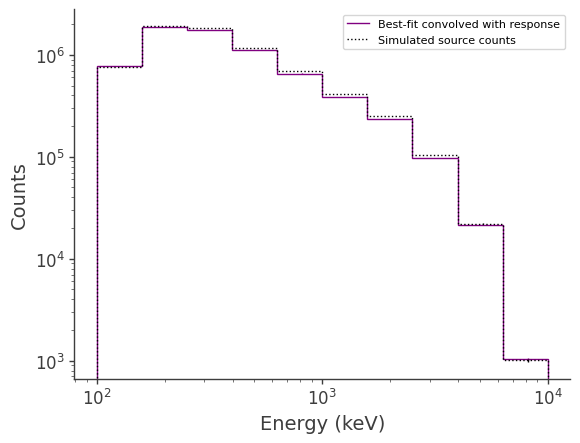

In [10]:
%matplotlib inline
# Get expected counts from likelihood scan (i.e. best-fit convolved with response):
total_expectation = cosi._expected_counts['galprop_source']
print()
print("galdiff expected counts:")
print(total_expectation.project('Em').todense().contents)
print()

# Plot:
fig,ax = plt.subplots()

binned_energy_edges = galdiff.binned_data.axes['Em'].edges.value
binned_energy = galdiff.binned_data.axes['Em'].centers.value

ax.stairs(total_expectation.project('Em').todense().contents, binned_energy_edges, color='purple', label = "Best-fit convolved with response")
ax.errorbar(binned_energy, total_expectation.project('Em').todense().contents, yerr=np.sqrt(total_expectation.project('Em').todense().contents), color='purple', linewidth=0, elinewidth=1)
ax.stairs(galdiff.binned_data.project('Em').todense().contents, binned_energy_edges, color = 'black', ls = ":", label = "Simulated source counts")
ax.errorbar(binned_energy, galdiff.binned_data.project('Em').todense().contents, yerr=np.sqrt(galdiff.binned_data.project('Em').todense().contents), color='black', linewidth=0, elinewidth=1)

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Counts")
plt.yscale('log')
plt.xscale('log')
ax.legend()
plt.savefig("injected_model_comparison.pdf")
plt.show()
plt.close()

percent difference: 

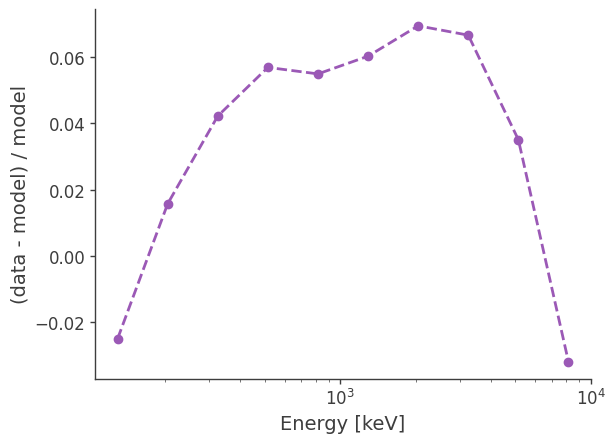

In [11]:
diff = (galdiff.binned_data.project('Em').todense().contents - total_expectation.project('Em').todense().contents)/total_expectation.project('Em').todense().contents

plt.semilogx(binned_energy,diff,ls="--",marker="o")
plt.xlabel("Energy [keV]")
plt.ylabel("(data - model) / model")
plt.savefig("percent_diff.pdf")
plt.show()
plt.close()

Compare best-fit to injected for total counts:

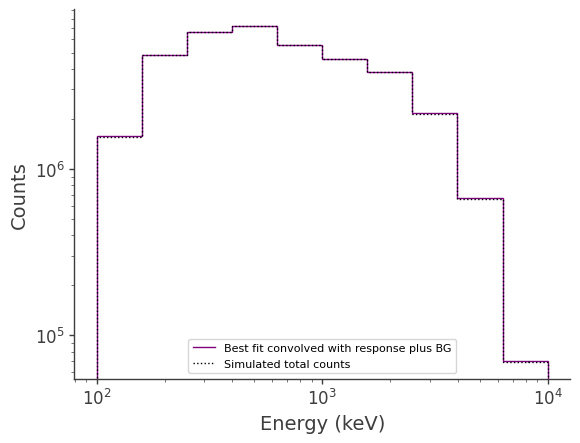

In [12]:
# Plot:
fig,ax = plt.subplots()

ax.stairs(total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents) \
        , binned_energy_edges, color='purple', label = "Best fit convolved with response plus BG")
ax.errorbar(binned_energy, total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents) \
        , yerr=np.sqrt(total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents)), \
        color='purple', linewidth=0, elinewidth=1)
ax.stairs(data_combined.binned_data.project('Em').todense().contents, binned_energy_edges, \
        color = 'black', ls = ":", label = "Simulated total counts")
ax.errorbar(binned_energy, data_combined.binned_data.project('Em').todense().contents, \
        yerr=np.sqrt(data_combined.binned_data.project('Em').todense().contents), color='black', linewidth=0, elinewidth=1)

ax.set_xlabel("Energy (keV)")
ax.set_ylabel("Counts")

ax.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig("injected_total_comparison.pdf")
plt.show()
plt.close()

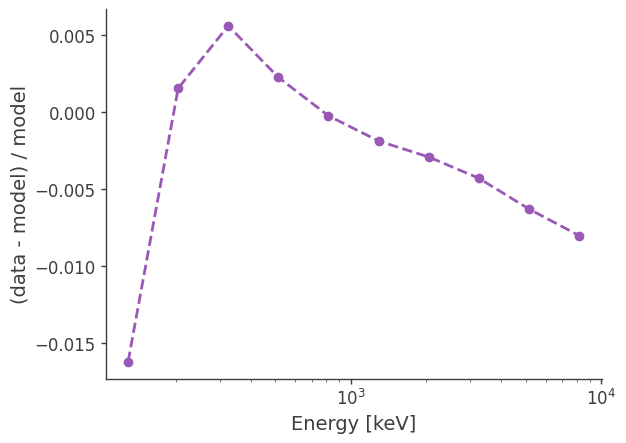

In [13]:
mod_tot = total_expectation.project('Em').todense().contents \
        +(bkg_par.value * bg_tot.binned_data.project('Em').todense().contents)
diff = (data_combined.binned_data.project('Em').todense().contents - mod_tot)/mod_tot

plt.semilogx(binned_energy,diff,ls="--",marker="o")
plt.xlabel("Energy [keV]")
plt.ylabel("(data - model) / model")
plt.savefig("percent_diff.pdf")
plt.show()
plt.close()

Plot average intensity (averaged over full sky):

INFO:cosipy.threeml.custom_functions:using nside=8 from user input in evaluate method
INFO:cosipy.threeml.custom_functions:loading GALPROP model: GALPROP_DC3/total_healpix_57_SA100_F98_example.gz
INFO:cosipy.threeml.custom_functions:Interpolating GALPROP map...


intensity error:
[6.56078943e-07 6.93643149e-07 7.23477880e-07 7.63933238e-07
 8.07484834e-07 8.81433266e-07 9.58088343e-07 1.07182018e-06
 1.18119475e-06 1.33628090e-06]


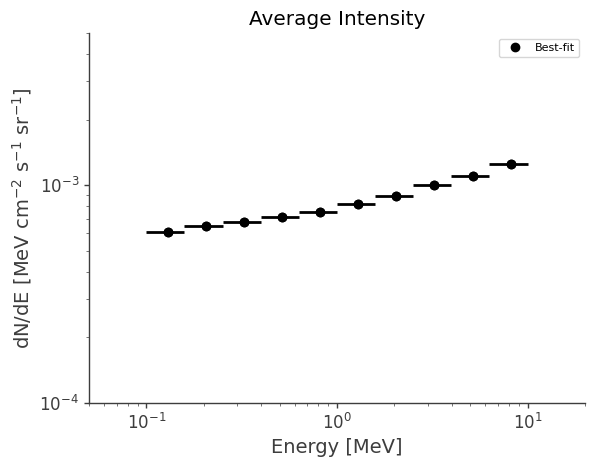

In [14]:
# Get parameter error manually:
hdu = fits.open("fit_results.fits")
data = hdu[1].data
K = data['VALUE'][0]
Kerr = data["ERROR"][0]

# We will pass the response nside in order to use the same spatial sampling as the fit:
with FullDetectorResponse.open(rsp_file) as response:
    nside = response.nside

# We will also use the same energy values as was used in the fit:
binned_energy = galdiff.binned_data.axes['Em'].centers.to(u.MeV).value
binned_energy_edges = galdiff.binned_data.axes['Em'].edges.to(u.MeV).value
energy_err = np.diff(binned_energy_edges)/2.0

# Below we will pass avg_int=True in order to get the average intensity. Otherwise, the function returns the total intensity by default.
intensity = results.optimized_model["galprop_source"].spatial_shape.get_total_spatial_integral(binned_energy, avg_int=True, nside=nside)
intensity = intensity.value

yerr = (Kerr/K)*(intensity)
yerr *= (binned_energy**2)
print("intensity error:")
print(yerr)

intensity *= (binned_energy**2)

fig,ax = plt.subplots()

ax.loglog(binned_energy, intensity, ls="", marker="o", color="black", label = "Best-fit")
ax.errorbar(binned_energy, intensity, xerr=energy_err, yerr=yerr, ls="", marker="o", color="black", label = "_nolabel_")

# Plot model specturm with galpy:
# This is optional and requires galpy package:
# https://github.com/ckarwin/galpy
#from galpy import GalMapsHeal
#instance = GalMapsHeal()
#instance.read_healpix_file("GALPROP_DC3/total_healpix_57_SA100_F98_example.gz")
#instance.make_spectrum()
#gal_energy = instance.energy
#gal_spec = instance.spectra_list
#ax.loglog(gal_energy, gal_spec, ls="-", marker="", color="red", label = "GALPROP model")

plt.ylabel("dN/dE [$\mathrm{MeV \ cm^{-2} \ s^{-1} \ sr^{-1}}$]")
plt.xlabel("Energy [MeV]")
plt.title("Average Intensity")
ax.legend()
plt.xlim(5e-2,20)
plt.ylim(1e-4,5e-3)
plt.savefig("intensity.pdf")
plt.show()
plt.close()

Below we plot the best-fit spectrum just for demonstration. Again, this is just a dummy model since the spectrum is contained in the 3D data cube. This has no impact on the fit.    

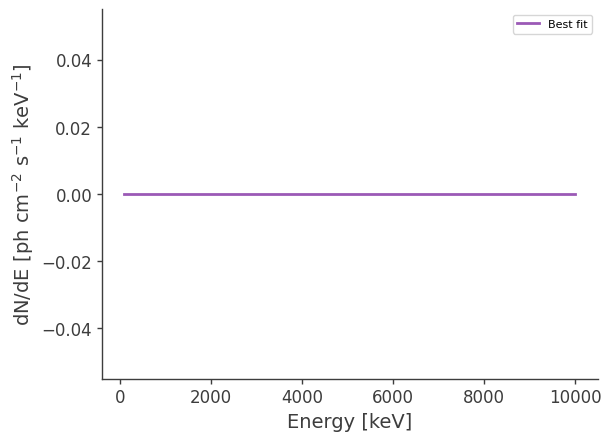

In [15]:
energy = np.linspace(100.,10000.,201)*u.keV
flux = results.optimized_model["galprop_source"].spectrum.main.shape(energy)

fig,ax = plt.subplots()

ax.plot(energy, flux, label = "Best fit")

plt.ylabel("dN/dE [$\mathrm{ph \ cm^{-2} \ s^{-1} \ keV^{-1}}$]", fontsize=14)
plt.xlabel("Energy [keV]", fontsize=14)
ax.legend()
plt.savefig("best_fit_model.pdf")
plt.show()
plt.close()